Define database, establish connection and import packages.

In [230]:
db_name = 'City_Energy_Data'
import mysql.connector 
import pandas as pd
import config
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [231]:
cnx = mysql.connector.connect(
    host = config.host,
    user = config.user,
    passwd = config.passwd,
    database = db_name
)
cur = cnx.cursor()

Pull city population data and residential energy data from database.


In [232]:
stmt = """
SELECT p.city, p.state, p.population, r.housing_units, r.elec_mwh, r.elec_lb_ghg
FROM population_data AS p
INNER JOIN residential_energy_A AS r ON p.city_id=r.city_id;
"""
cur.execute(stmt)
rdf = pd.DataFrame(cur.fetchall())
rdf.columns = [x[0] for x in cur.description]


Modify population column in preparation for plotting and analysis.

In [233]:
rdf['population'] = rdf['population'].apply(lambda x: x.replace(',', ''))


In [234]:
rdf['population'] = rdf['population'].astype(int)

In [235]:
rdf.describe()

population  housing_units      elec_mwh   elec_lb_ghg
count  4.880000e+03   4.878000e+03  4.878000e+03  4.878000e+03
mean   3.503991e+04   1.369580e+04  1.328855e+05  1.679552e+08
std    1.597162e+05   6.005481e+04  4.313993e+05  2.917229e+08
min    4.298000e+03   1.550000e+02  1.228000e+03  2.211122e+06
25%    6.954750e+03   2.727500e+03  2.927900e+04  4.347022e+07
50%    1.244950e+04   4.904000e+03  5.193850e+04  7.679651e+07
75%    2.790300e+04   1.103275e+04  1.104965e+05  1.619719e+08
max    8.363710e+06   3.128246e+06  1.487296e+07  2.147484e+09

Use functions to create electricity per person and ghg per person columns.

In [238]:
rdf['elec_per_person'] = rdf.apply(lambda x: elec_person(x.population, x.elec_mwh), axis=1)

In [239]:
rdf['ghg_per_person'] = rdf.apply(lambda x: ghg_person(x.population, x.elec_lb_ghg), axis=1)

Plot distribution of electricity per person 

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/lib/histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:448: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequen

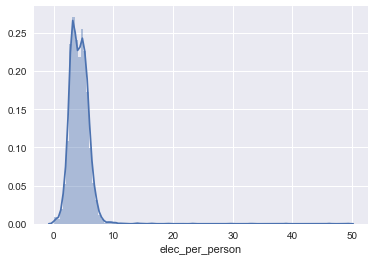

In [241]:

sns.distplot(rdf['elec_per_person'], bins=100)


Create boxplot to check for outlier cities in electricity per person 

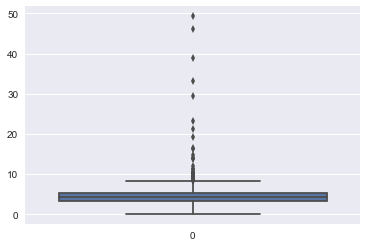

In [242]:
sns.boxplot(data=rdf['elec_per_person'])

Explore data further by checking cities with highest electricity consumption and ghg emissions per person

In [243]:
rdf.sort_values('ghg_per_person', ascending=False).head()

city state  population  housing_units   elec_mwh   elec_lb_ghg  \
2388      Babylon    NY       12760        67324.0   628883.0  1.173254e+09   
4854  Southampton    NY        4323        21099.0   199547.0  3.722779e+08   
3176      Colonie    NY        8591        31853.0   284394.0  5.120657e+08   
4366      Webster    NY        5185        17480.0   153172.0  2.757944e+08   
4671      Manlius    NY        4579        13202.0   106660.0  1.920461e+08   
631     Hempstead    NY       53915       241712.0  2097394.0  2.147484e+09   
4585   Montgomery    NY        4741         8285.0   100039.0  1.801253e+08   
2970      Hamburg    NY        9400        23880.0   152338.0  2.742932e+08   
3726      Warwick    NY        6724        11614.0    93749.0  1.688000e+08   
1971  Bella Vista    AR       16388        12085.0   186304.0  3.953118e+08   
4413       Leland    NC        5094         6574.0    97570.0  1.209564e+08   
4871     Chelsea     AL        4303         3916.0    63359.0  1.005400e+08   
4862     Bluffton    SC        4312         5235.0    71427.0  8.854737e+07   
2302    Whitehall    PA       13400        10885.0   129938.0  2.504086e+08   
2647    Lancaster    NY       11108        17108.0   115222.0  2.074628e+08   
2270   Zionsville    IN       13655         9232.0   144461.0  2.462913e+08   
2083      Milton     GA       15156        12404.0   171591.0  2.722862e+08   
3904   Horseheads    NY        6254         7997.0    62182.0  1.119625e+08   
3289       Monroe    NY        8168        10229.0    79930.0  1.439180e+08   
4551  Winterville    NC        4813         3668.0    67890.0  8.416253e+07   

      elec_per_person  ghg_per_person  
2388        49.285502    91947.842790  
4854        46.159380    86115.642147  
3176        33.103713    59604.896520  
4366        29.541369    53190.815236  
4671        23.293295    41940.630705  
631         38.901864    39830.912492  
4585        21.100823    37993.101034  
2970        16.206170    29180.125319  
3726        13.942445    25104.102766  
1971        11.368318    24122.025812  
4413        19.153907    23744.879662  
4871        14.724378    23365.102254  
4862        16.564703    20535.104128  
2302         9.696866    18687.207836  
2647        10.372884    18676.882697  
2270        10.579348    18036.713731  
2083        11.321655    17965.571127  
3904         9.942757    17902.539495  
3289         9.785749    17619.737757  
4551        14.105547    17486.500312

In [244]:
rdf.sort_values('elec_per_person', ascending=False).head()

city state  population  housing_units   elec_mwh   elec_lb_ghg  \
2388      Babylon    NY       12760        67324.0   628883.0  1.173254e+09   
4854  Southampton    NY        4323        21099.0   199547.0  3.722779e+08   
631     Hempstead    NY       53915       241712.0  2097394.0  2.147484e+09   
3176      Colonie    NY        8591        31853.0   284394.0  5.120657e+08   
4366      Webster    NY        5185        17480.0   153172.0  2.757944e+08   
4671      Manlius    NY        4579        13202.0   106660.0  1.920461e+08   
4585   Montgomery    NY        4741         8285.0   100039.0  1.801253e+08   
4413       Leland    NC        5094         6574.0    97570.0  1.209564e+08   
4862     Bluffton    SC        4312         5235.0    71427.0  8.854737e+07   
2970      Hamburg    NY        9400        23880.0   152338.0  2.742932e+08   
4871     Chelsea     AL        4303         3916.0    63359.0  1.005400e+08   
4551  Winterville    NC        4813         3668.0    67890.0  8.416253e+07   
3726      Warwick    NY        6724        11614.0    93749.0  1.688000e+08   
2987      Groton     CT        9316        16052.0   128511.0  1.394684e+08   
2337    Clermont     FL       13100        11277.0   157318.0  2.219769e+08   
1971  Bella Vista    AR       16388        12085.0   186304.0  3.953118e+08   
2083      Milton     GA       15156        12404.0   171591.0  2.722862e+08   
2270   Zionsville    IN       13655         9232.0   144461.0  2.462913e+08   
4077   Harrisburg    NC        5819         4311.0    60517.0  7.502308e+07   
3619      Prosper    TX        7053         4508.0    73339.0  9.820155e+07   

      elec_per_person  ghg_per_person  
2388        49.285502    91947.842790  
4854        46.159380    86115.642147  
631         38.901864    39830.912492  
3176        33.103713    59604.896520  
4366        29.541369    53190.815236  
4671        23.293295    41940.630705  
4585        21.100823    37993.101034  
4413        19.153907    23744.879662  
4862        16.564703    20535.104128  
2970        16.206170    29180.125319  
4871        14.724378    23365.102254  
4551        14.105547    17486.500312  
3726        13.942445    25104.102766  
2987        13.794654    14970.842744  
2337        12.009008    16944.803282  
1971        11.368318    24122.025812  
2083        11.321655    17965.571127  
2270        10.579348    18036.713731  
4077        10.399897    12892.778656  
3619        10.398270    13923.373175

Import statsitical packages in preparation for z test. Create sample dataframe of the 250 most populous cities in the country and check descriptive stats for sample. 

In [245]:
import math
import scipy.stats as stats

In [246]:
populous_bois = rdf.sort_values('population', ascending=False).head(250)

In [247]:
rdf.describe()

population  housing_units      elec_mwh   elec_lb_ghg  \
count  4.880000e+03   4.878000e+03  4.878000e+03  4.878000e+03   
mean   3.503991e+04   1.369580e+04  1.328855e+05  1.679552e+08   
std    1.597162e+05   6.005481e+04  4.313993e+05  2.917229e+08   
min    4.298000e+03   1.550000e+02  1.228000e+03  2.211122e+06   
25%    6.954750e+03   2.727500e+03  2.927900e+04  4.347022e+07   
50%    1.244950e+04   4.904000e+03  5.193850e+04  7.679651e+07   
75%    2.790300e+04   1.103275e+04  1.104965e+05  1.619719e+08   
max    8.363710e+06   3.128246e+06  1.487296e+07  2.147484e+09   

       elec_per_person  ghg_per_person  
count      4878.000000     4878.000000  
mean          4.285972     6366.342481  
std           1.912878     3327.329657  
min           0.066207       90.897228  
25%           3.159257     4406.951076  
50%           4.177876     6035.437993  
75%           5.231301     7939.886014  
max          49.285502    91947.842790

Check sample distribution of per person electricity consumption

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


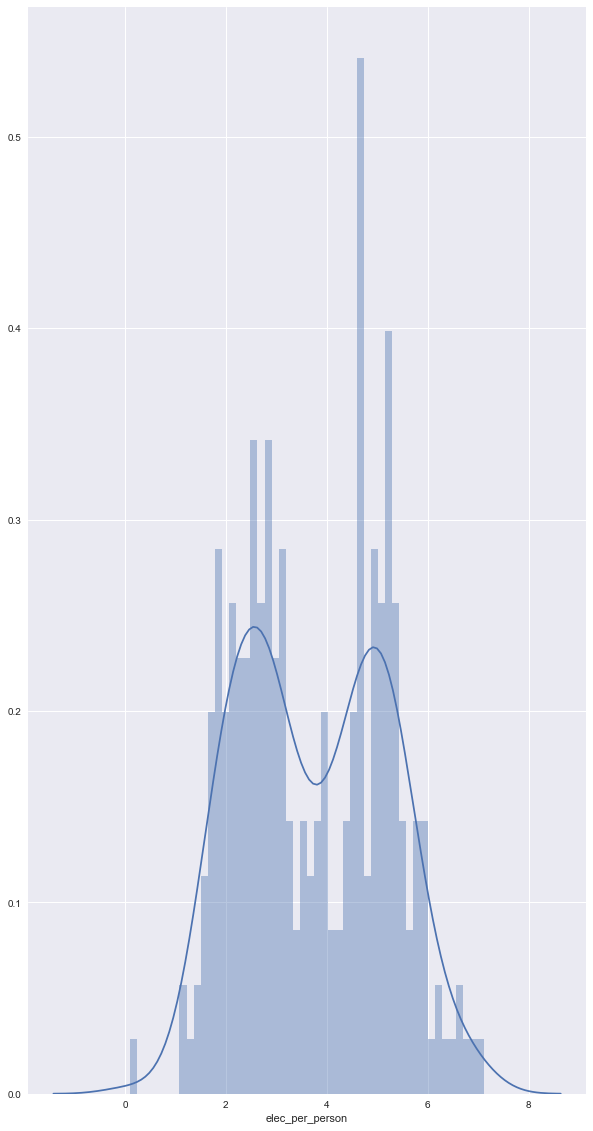

In [253]:
plt.figure(figsize=(10,20))
sns.distplot(populous_bois['elec_per_person'], bins=50)

Conduct z test for sample and overall population sample was drawn from. 

In [256]:
x_bar = 3.73713 # sample mean 
n = 250 # number of students
sigma = 1.912878 # sd of population
mu = 4.28597 # Population mean 

z = (x_bar - mu)/(sigma/math.sqrt(n))
p = stats.norm.cdf(z)

p,z

(2.8587025774803437e-06, -4.536579099678109)

Repeat process for a sample consisting of the 250 least populous cities in the US.

In [258]:
rural_bois = rdf.sort_values('population', ascending=True).head(250)

/Users/kylebaranko/anaconda3/envs/learn-env/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


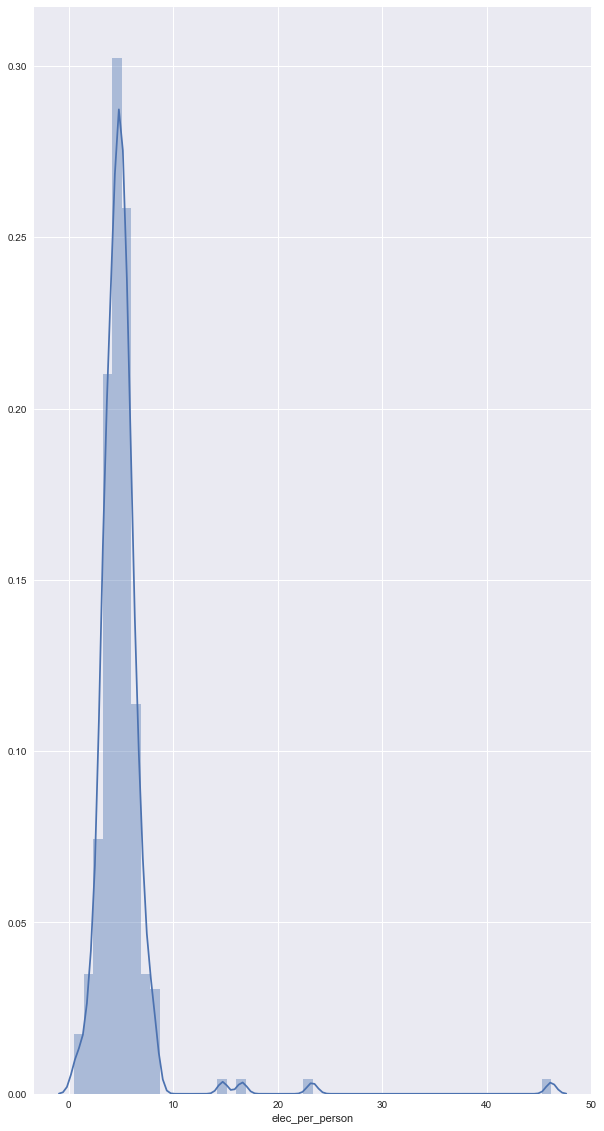

In [259]:
plt.figure(figsize=(10,20))
sns.distplot(rural_bois['elec_per_person'], bins=50)

In [263]:
mu = rdf['elec_per_person'].mean()
sigma = rdf['elec_per_person'].std() 
n= len(rural_bois)
x_bar = rural_bois['elec_per_person'].mean()
z = (x_bar - mu)/(sigma/math.sqrt(n))
p = stats.norm.cdf(z)

p,z

(0.9999999999866108, 6.663278969895499)

Measure population density by creating a people per building metric. 

In [226]:
rdf['people_per_building'] = rdf['population'] / rdf['housing_units']

In [228]:
rdf.sort_values('people_per_building', ascending=False)

city state  population  housing_units   elec_mwh  \
1408     New Castle     PA       24212          171.0     1603.0   
1305       Superior     WI       26223          285.0     2202.0   
1417        Lebanon     PA       24097          312.0     3594.0   
93        Rochester     NY      206886         2916.0    19822.0   
1307            Plum    PA       26198          424.0     4290.0   
2892     Northampton    PA        9841          175.0     2217.0   
619       Lancaster     PA       54626          986.0    12886.0   
2908       Big Lake     MN        9795          234.0     2362.0   
359         Reading     PA       80506         2150.0    27004.0   
4175      Salamanca     NY        5592          155.0     1228.0   
836    Wilkes-Barre     PA       40932         1198.0    11259.0   
3963      Greenville    PA        6103          196.0     2488.0   
3745       Franklin     PA        6664          238.0     3164.0   
2499        Dunkirk     NY       12085          486.0     3160.0   
2848        Columbia    PA       10033          417.0     3707.0   
772      Binghamton     NY       44729         1872.0    16863.0   
2969         Warren     PA        9403          421.0     4360.0   
1769         Baldwin    PA       18562          844.0     6944.0   
2103         Hanover    PA       15025          701.0     8115.0   
4825          Beaver    PA        4371          216.0     2161.0   
3942          Taylor    PA        6151          354.0     4416.0   
3780        Lawrence    NY        6573          482.0     4050.0   
4481      Sugarcreek    PA        4969          416.0     4034.0   
4581   Colorado City    AZ        4750          404.0     5160.0   
4873         Waverly    NY        4303          390.0     3095.0   
4818  Mount Pleasant    PA        4380          408.0     4510.0   
2138     Washington     PA       14754         1438.0    15909.0   
4751      Whiteville    TN        4464          458.0     6917.0   
3465     Calipatria     CA        7594          864.0    10643.0   
4527   Little Falls     NY        4867          599.0     5171.0   
...              ...   ...         ...            ...        ...   
734        Kirkland     WA       47303        35094.0   342853.0   
2304       Princeton    NJ       13391         9973.0    76335.0   
2279   Lake Stevens     WA       13599        10229.0   125345.0   
4551     Winterville    NC        4813         3668.0    67890.0   
2302       Whitehall    PA       13400        10885.0   129938.0   
2083         Milton     GA       15156        12404.0   171591.0   
4178          Goshen    NY        5585         4610.0    35639.0   
45          Honolulu    HI      374676       309355.0  1912612.0   
2337       Clermont     FL       13100        11277.0   157318.0   
4871        Chelsea     AL        4303         3916.0    63359.0   
4243            Bath    NY        5432         5087.0    39547.0   
2094            Rye     NY       15060        15296.0   115779.0   
2669      Haverstraw    NY       11029        11980.0   105154.0   
4862        Bluffton    SC        4312         5235.0    71427.0   
3289          Monroe    NY        8168        10229.0    79930.0   
3904      Horseheads    NY        6254         7997.0    62182.0   
4413          Leland    NC        5094         6574.0    97570.0   
2647       Lancaster    NY       11108        17108.0   115222.0   
2987         Groton     CT        9316        16052.0   128511.0   
3726         Warwick    NY        6724        11614.0    93749.0   
4585      Montgomery    NY        4741         8285.0   100039.0   
2970         Hamburg    NY        9400        23880.0   152338.0   
4671         Manlius    NY        4579        13202.0   106660.0   
4366         Webster    NY        5185        17480.0   153172.0   
3176         Colonie    NY        8591        31853.0   284394.0   
631        Hempstead    NY       53915       241712.0  2097394.0   
4854     Southampton    NY        4323        21099.0   199547.0   
2388